In [2]:
from random import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
import pandas as pd
from scipy import stats, optimize
import sklearn
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
# df = data 
df = pd.read_csv('gnomAD.csv')
df.shape[0]

5883

In [47]:
df.head()

,gnomAD ID,Chromosome,Position,rsIDs,Reference,Alternate,Source,Filters - exomes,Filters - genomes,Transcript,...,Homozygote Count Amish,Hemizygote Count Amish,Allele Count South Asian,Allele Number South Asian,Homozygote Count South Asian,Hemizygote Count South Asian,Allele Count Remaining,Allele Number Remaining,Homozygote Count Remaining,Hemizygote Count Remaining
0,7-117480021-CAG-C,7,117480021,NaN,CAG,C,gnomAD Exomes,PASS,NaN,ENST00000648260.1,...,0,0,1,86294,0,0,0,54566,0,0
1,7-117480025-G-A,7,117480025,NaN,G,A,gnomAD Exomes,PASS,NaN,ENST00000003084.11,...,0,0,3,86894,0,0,0,55456,0,0
2,7-117480026-T-C,7,117480026,NaN,T,C,gnomAD Exomes,PASS,NaN,ENST00000003084.11,...,0,0,1,86808,0,0,0,55372,0,0
3,7-117480028-G-A,7,117480028,NaN,G,A,gnomAD Exomes,PASS,NaN,ENST00000003084.11,...,0,0,1,87548,0,0,0,56518,0,0
4,7-117480029-T-C,7,117480029,rs1797974971,T,C,"gnomAD Exomes,gnomAD Genomes",PASS,PASS,ENST00000003084.11,...,0,0,0,87626,0,0,0,56670,0,0


In [3]:
df = df.drop(columns = ['Chromosome', 'Source', 'Transcript', 'HGVS Consequence', 'Flags'])
df.head()

NameError: name 'df' is not defined

In [4]:
# df = df.drop(['Source'], axis=1)
# df.head()

In [ ]:
# df = df.drop(['Transcript'], axis=1)
# df.head()

,gnomAD ID,Position,rsIDs,Reference,Alternate,Filters - exomes,Filters - genomes,HGVS Consequence,Protein Consequence,Transcript Consequence,...,Homozygote Count Amish,Hemizygote Count Amish,Allele Count South Asian,Allele Number South Asian,Homozygote Count South Asian,Hemizygote Count South Asian,Allele Count Remaining,Allele Number Remaining,Homozygote Count Remaining,Hemizygote Count Remaining
0,7-117480021-CAG-C,117480021,NaN,CAG,C,PASS,NaN,c.-71_-70del,NaN,c.-71_-70del,...,0,0,1,86294,0,0,0,54566,0,0
1,7-117480025-G-A,117480025,NaN,G,A,PASS,NaN,c.-70G>A,NaN,c.-70G>A,...,0,0,3,86894,0,0,0,55456,0,0
2,7-117480026-T-C,117480026,NaN,T,C,PASS,NaN,c.-69T>C,NaN,c.-69T>C,...,0,0,1,86808,0,0,0,55372,0,0
3,7-117480028-G-A,117480028,NaN,G,A,PASS,NaN,c.-67G>A,NaN,c.-67G>A,...,0,0,1,87548,0,0,0,56518,0,0
4,7-117480029-T-C,117480029,rs1797974971,T,C,PASS,PASS,c.-66T>C,NaN,c.-66T>C,...,0,0,0,87626,0,0,0,56670,0,0


In [ ]:
# (df[df['Homozygote Count Amish'] != 0]).shape[0]

17

In [5]:
(df[df['Hemizygote Count'] == 0]).shape[0]

NameError: name 'df' is not defined

## Calculate frequencies

In [6]:
df

NameError: name 'df' is not defined

In [7]:
ethnicities = ["African/African American", "Admixed American", "Ashkenazi Jewish", "East Asian", "European (Finnish)", "Middle Eastern", "European (non-Finnish)", "Amish", "South Asian"]

In [8]:
for key in ethnicities:
    df["Allele frequency " + key] = df["Allele Count " + key] / df["Allele Number " + key]
df

NameError: name 'df' is not defined

In [ ]:
# df.to_csv('new_gnomAD.csv')

## Start here

In [3]:
df = pd.read_csv("new_gnomAD.csv")

In [4]:
df.head()

,gnomAD ID,Position,rsIDs,Reference,Alternate,Filters - exomes,Filters - genomes,Protein Consequence,Transcript Consequence,VEP Annotation,...,Hemizygote Count Amish,Allele Count South Asian,Allele Number South Asian,Allele frequency South Asian,Homozygote Count South Asian,Hemizygote Count South Asian,Allele Count Remaining,Allele Number Remaining,Homozygote Count Remaining,Hemizygote Count Remaining
0,7-117480021-CAG-C,117480021,NaN,CAG,C,PASS,NaN,NaN,c.-71_-70del,5_prime_UTR_variant,...,0,1,86294,0.000012,0,0,0,54566,0,0
1,7-117480025-G-A,117480025,NaN,G,A,PASS,NaN,NaN,c.-70G>A,5_prime_UTR_variant,...,0,3,86894,0.000035,0,0,0,55456,0,0
2,7-117480026-T-C,117480026,NaN,T,C,PASS,NaN,NaN,c.-69T>C,5_prime_UTR_variant,...,0,1,86808,0.000012,0,0,0,55372,0,0
3,7-117480028-G-A,117480028,NaN,G,A,PASS,NaN,NaN,c.-67G>A,5_prime_UTR_variant,...,0,1,87548,0.000011,0,0,0,56518,0,0
4,7-117480029-T-C,117480029,rs1797974971,T,C,PASS,PASS,NaN,c.-66T>C,5_prime_UTR_variant,...,0,0,87626,0.000000,0,0,0,56670,0,0


In [5]:
df.columns

Index(['gnomAD ID', 'Position', 'rsIDs', 'Reference', 'Alternate',
       'Filters - exomes', 'Filters - genomes', 'Protein Consequence',
       'Transcript Consequence', 'VEP Annotation',
       'ClinVar Germline Classification', 'ClinVar Variation ID',
       'Allele Count', 'Allele Number', 'Allele Frequency', 'Homozygote Count',
       'Hemizygote Count', 'Filters - joint', 'GroupMax FAF group',
       'GroupMax FAF frequency', 'cadd', 'revel_max', 'spliceai_ds_max',
       'pangolin_largest_ds', 'phylop', 'sift_max', 'polyphen_max',
       'Allele Count African/African American',
       'Allele Number African/African American',
       'Allele frequency African/African American',
       'Homozygote Count African/African American',
       'Hemizygote Count African/African American',
       'Allele Count Admixed American', 'Allele Number Admixed American',
       'Allele frequency Admixed American',
       'Homozygote Count Admixed American',
       'Hemizygote Count Admixed American

In [6]:
for key in df.columns :
    if "Unnamed" in key :
        print("coucou")
        df = df.drop(key, axis = 1)
df.columns

Index(['gnomAD ID', 'Position', 'rsIDs', 'Reference', 'Alternate',
       'Filters - exomes', 'Filters - genomes', 'Protein Consequence',
       'Transcript Consequence', 'VEP Annotation',
       'ClinVar Germline Classification', 'ClinVar Variation ID',
       'Allele Count', 'Allele Number', 'Allele Frequency', 'Homozygote Count',
       'Hemizygote Count', 'Filters - joint', 'GroupMax FAF group',
       'GroupMax FAF frequency', 'cadd', 'revel_max', 'spliceai_ds_max',
       'pangolin_largest_ds', 'phylop', 'sift_max', 'polyphen_max',
       'Allele Count African/African American',
       'Allele Number African/African American',
       'Allele frequency African/African American',
       'Homozygote Count African/African American',
       'Hemizygote Count African/African American',
       'Allele Count Admixed American', 'Allele Number Admixed American',
       'Allele frequency Admixed American',
       'Homozygote Count Admixed American',
       'Hemizygote Count Admixed American

## Prediction of non labeled data (projection)

In [7]:
df_lite = df[["Allele Frequency", "cadd", "spliceai_ds_max", "pangolin_largest_ds", "phylop", "ClinVar Germline Classification"]]

In [8]:
df_lite = df_lite[df_lite['Allele Frequency'] < 1] # added afterwards
df_lite

,Allele Frequency,cadd,spliceai_ds_max,pangolin_largest_ds,phylop,ClinVar Germline Classification
0,7.288608e-07,13.900,0.00,-0.04,-0.184,NaN
1,3.575152e-06,11.900,0.01,0.03,0.032,NaN
2,1.432821e-06,12.600,0.00,0.01,1.390,NaN
3,6.983611e-07,12.800,0.00,0.20,1.360,NaN
4,3.483092e-06,10.500,0.00,0.01,-1.190,NaN
...,...,...,...,...,...,...
5878,6.568749e-06,7.870,0.00,0.01,-0.322,NaN
5879,1.317349e-05,1.120,0.00,0.02,0.456,NaN
5880,6.572461e-06,1.430,0.15,0.17,0.433,NaN
5881,1.314250e-05,0.762,0.11,0.13,-2.020,NaN


In [9]:
labeled = df_lite[df_lite["ClinVar Germline Classification"].notnull()]
labeled.shape[0]

2397

In [10]:
labeled

,Allele Frequency,cadd,spliceai_ds_max,pangolin_largest_ds,phylop,ClinVar Germline Classification
33,1.866419e-06,17.00,0.0,0.03,3.860,Likely benign
35,1.245206e-06,17.10,0.0,-0.05,3.140,Conflicting classifications of pathogenicity
51,4.337604e-06,12.80,0.0,-0.05,0.926,Likely benign
52,1.858996e-06,22.80,0.0,-0.20,1.860,Pathogenic
56,5.186798e-02,15.20,0.0,-0.07,1.740,Benign/Likely benign
...,...,...,...,...,...,...
5776,2.478656e-06,24.30,0.0,0.02,6.910,Uncertain significance
5779,6.197184e-07,25.60,0.0,0.01,3.640,Uncertain significance
5781,6.197277e-07,10.20,0.0,0.02,1.190,Likely pathogenic
5783,1.127952e-04,4.33,0.0,0.01,0.261,Conflicting classifications of pathogenicity


In [11]:
unlabeled =  df_lite[df_lite["ClinVar Germline Classification"].isna()]
unlabeled

,Allele Frequency,cadd,spliceai_ds_max,pangolin_largest_ds,phylop,ClinVar Germline Classification
0,7.288608e-07,13.900,0.00,-0.04,-0.184,NaN
1,3.575152e-06,11.900,0.01,0.03,0.032,NaN
2,1.432821e-06,12.600,0.00,0.01,1.390,NaN
3,6.983611e-07,12.800,0.00,0.20,1.360,NaN
4,3.483092e-06,10.500,0.00,0.01,-1.190,NaN
...,...,...,...,...,...,...
5878,6.568749e-06,7.870,0.00,0.01,-0.322,NaN
5879,1.317349e-05,1.120,0.00,0.02,0.456,NaN
5880,6.572461e-06,1.430,0.15,0.17,0.433,NaN
5881,1.314250e-05,0.762,0.11,0.13,-2.020,NaN


#### Training

In [12]:
n_train = int(4/5 * labeled.shape[0])
n_train

1917

In [13]:
n_test = labeled.shape[0]-n_train

traintest = labeled.sample(frac = 1).reset_index(drop=True)

In [14]:
X_train = traintest.iloc[:n_train]
X_train

,Allele Frequency,cadd,spliceai_ds_max,pangolin_largest_ds,phylop,ClinVar Germline Classification
0,1.241914e-06,7.260,0.00,0.00,0.701,Likely benign
1,2.478481e-06,24.600,0.00,-0.03,7.040,Pathogenic
2,1.115573e-05,15.200,0.00,0.01,2.210,Uncertain significance
3,6.210008e-07,39.000,0.13,-0.23,7.000,Pathogenic
4,6.271739e-07,32.000,0.11,-0.15,6.310,Uncertain significance
...,...,...,...,...,...,...
1912,5.937114e-06,33.000,0.32,-0.20,8.760,Pathogenic
1913,6.199497e-07,0.166,0.00,-0.01,-0.329,Likely benign
1914,6.196985e-07,28.400,0.06,0.07,6.360,Conflicting classifications of pathogenicity
1915,6.815154e-06,8.780,0.00,-0.05,2.440,Likely benign


In [15]:
X_test = traintest.iloc[n_train:]
X_test

,Allele Frequency,cadd,spliceai_ds_max,pangolin_largest_ds,phylop,ClinVar Germline Classification
1917,0.000220,27.80,0.00,-0.01,6.310,Conflicting classifications of pathogenicity
1918,0.000020,42.00,0.00,0.12,8.900,Pathogenic/Likely pathogenic
1919,0.000017,23.40,0.15,0.04,0.943,Uncertain significance
1920,0.000004,2.27,0.00,0.00,-0.609,Likely benign
1921,0.000001,13.30,0.00,0.00,2.010,Uncertain significance
...,...,...,...,...,...,...
2392,0.000017,6.23,0.09,-0.11,-2.360,Likely benign
2393,0.000002,14.10,0.43,0.17,-0.003,Likely benign
2394,0.000001,26.60,0.00,-0.01,8.900,Uncertain significance
2395,0.000002,25.20,0.00,0.00,6.320,Uncertain significance


In [16]:
Y_train = X_train['ClinVar Germline Classification']
X_train = X_train.drop('ClinVar Germline Classification', axis = 1)
X_train

,Allele Frequency,cadd,spliceai_ds_max,pangolin_largest_ds,phylop
0,1.241914e-06,7.260,0.00,0.00,0.701
1,2.478481e-06,24.600,0.00,-0.03,7.040
2,1.115573e-05,15.200,0.00,0.01,2.210
3,6.210008e-07,39.000,0.13,-0.23,7.000
4,6.271739e-07,32.000,0.11,-0.15,6.310
...,...,...,...,...,...
1912,5.937114e-06,33.000,0.32,-0.20,8.760
1913,6.199497e-07,0.166,0.00,-0.01,-0.329
1914,6.196985e-07,28.400,0.06,0.07,6.360
1915,6.815154e-06,8.780,0.00,-0.05,2.440


In [17]:
Y_test = X_test['ClinVar Germline Classification']
X_test = X_test.drop('ClinVar Germline Classification', axis = 1)
X_test

,Allele Frequency,cadd,spliceai_ds_max,pangolin_largest_ds,phylop
1917,0.000220,27.80,0.00,-0.01,6.310
1918,0.000020,42.00,0.00,0.12,8.900
1919,0.000017,23.40,0.15,0.04,0.943
1920,0.000004,2.27,0.00,0.00,-0.609
1921,0.000001,13.30,0.00,0.00,2.010
...,...,...,...,...,...
2392,0.000017,6.23,0.09,-0.11,-2.360
2393,0.000002,14.10,0.43,0.17,-0.003
2394,0.000001,26.60,0.00,-0.01,8.900
2395,0.000002,25.20,0.00,0.00,6.320


In [18]:
from sklearn.ensemble import RandomForestClassifier


In [19]:
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

In [20]:
importances = forest.feature_importances_
importances

array([0.2313726 , 0.38360062, 0.07184415, 0.12136247, 0.19182015])

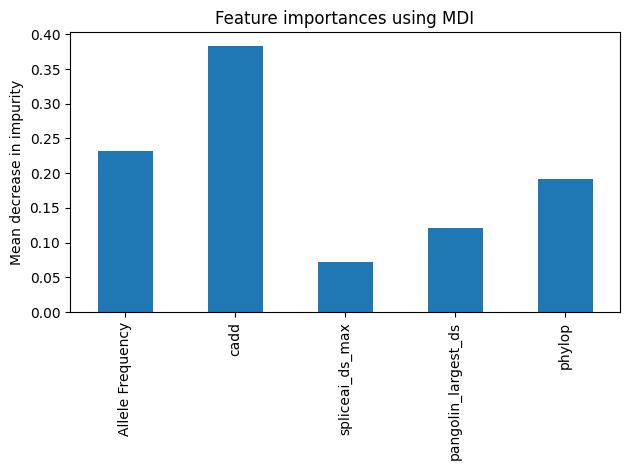

In [21]:
forest_importances = pd.Series(importances, index=["Allele Frequency", "cadd", "spliceai_ds_max", "pangolin_largest_ds", "phylop"])

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#### Testing

In [22]:
from sklearn.metrics import accuracy_score

Y_predicted = forest.predict(X_test)

accuracy = accuracy_score(Y_test,Y_predicted)
accuracy

0.6583333333333333

C:\Users\arche\AppData\Local\Temp\ipykernel_10044\780459227.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=pd.DataFrame(Y_predicted, columns = ["ClinVar Germline Classification"]), x="ClinVar Germline Classification", palette='viridis')


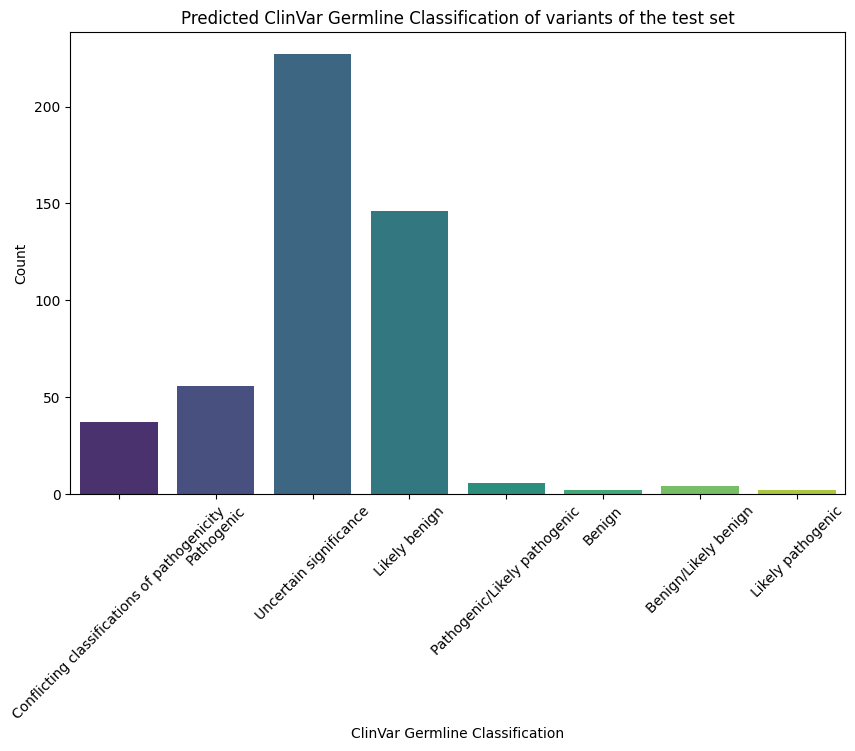

In [23]:
plt.figure(figsize=(10, 6))  # Width: 10, Height: 6

sns.countplot(data=pd.DataFrame(Y_predicted, columns = ["ClinVar Germline Classification"]), x="ClinVar Germline Classification", palette='viridis')

plt.xticks(rotation=45)  # Rotate labels by 45 degrees

plt.ylabel('Count')
plt.title('Predicted ClinVar Germline Classification of variants of the test set')

# Show the plot
plt.show()

#### Using the model

In [24]:
unlabeled = unlabeled.drop('ClinVar Germline Classification', axis = 1)
unlabeled

,Allele Frequency,cadd,spliceai_ds_max,pangolin_largest_ds,phylop
0,7.288608e-07,13.900,0.00,-0.04,-0.184
1,3.575152e-06,11.900,0.01,0.03,0.032
2,1.432821e-06,12.600,0.00,0.01,1.390
3,6.983611e-07,12.800,0.00,0.20,1.360
4,3.483092e-06,10.500,0.00,0.01,-1.190
...,...,...,...,...,...
5878,6.568749e-06,7.870,0.00,0.01,-0.322
5879,1.317349e-05,1.120,0.00,0.02,0.456
5880,6.572461e-06,1.430,0.15,0.17,0.433
5881,1.314250e-05,0.762,0.11,0.13,-2.020


In [25]:
Y_virtual = forest.predict(unlabeled)
Y_virtual

array(['Uncertain significance', 'Uncertain significance',
       'Uncertain significance', ..., 'Likely benign', 'Likely benign',
       'Conflicting classifications of pathogenicity'],
      shape=(3470,), dtype=object)

C:\Users\arche\AppData\Local\Temp\ipykernel_10044\1558265879.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=pd.DataFrame(Y_virtual, columns = ["ClinVar Germline Classification"]), x="ClinVar Germline Classification", palette='viridis')


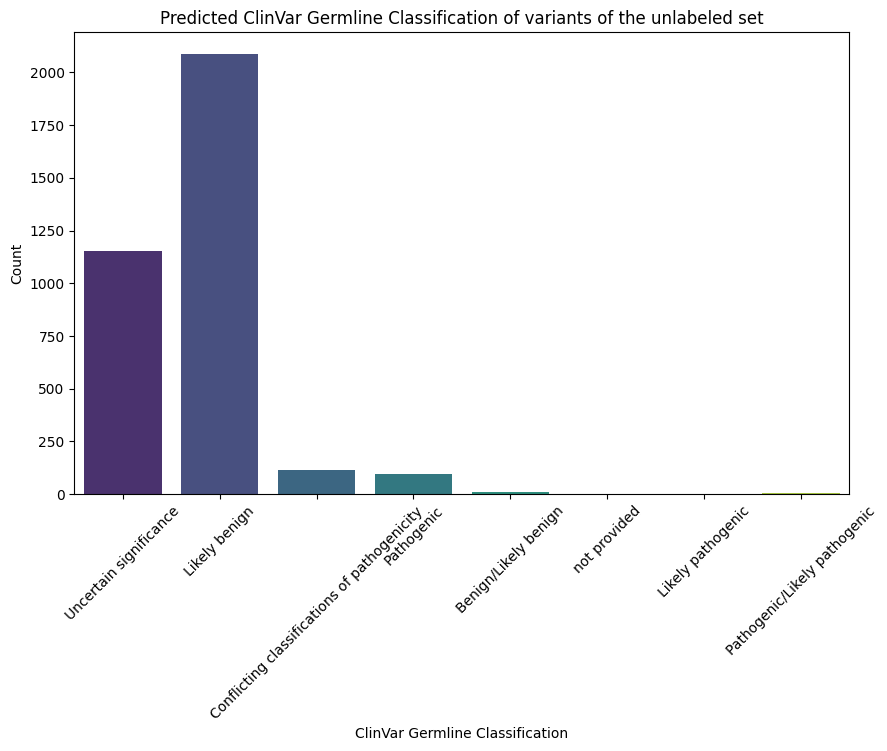

In [27]:
plt.figure(figsize=(10, 6))  # Width: 10, Height: 6

sns.countplot(data=pd.DataFrame(Y_virtual, columns = ["ClinVar Germline Classification"]), x="ClinVar Germline Classification", palette='viridis')

plt.xticks(rotation=45)  # Rotate labels by 45 degrees

plt.ylabel('Count')
plt.title('Predicted ClinVar Germline Classification of variants of the unlabeled set')

# Show the plot
plt.show()

## Simplifying the classification : pathogenic or not

We regroup into two categories : 
- Likely pathogenic (shortened to *pathogenic*), including 'Conflicting classifications of pathogenicity', 'Pathogenic', 'Pathogenic/Likely pathogenic'
- *non-pathogenic*, including 'Uncertain significance', 'Likely benign', 'Benign/Likely benign', 'not provided', 'drug response', 'Benign'

In [28]:
Y = traintest['ClinVar Germline Classification'].copy().dropna()
for i in range(len(Y)) :
    if Y[i] in ['Conflicting classifications of pathogenicity', 'Pathogenic', 'Pathogenic/Likely pathogenic']:
        Y[i] = 'pathogenic'
    else :
        Y[i] = 'non-pathogenic'

In [29]:
X_train = traintest.iloc[:n_train].drop('ClinVar Germline Classification',axis = 1)
Y_train = Y.iloc[:n_train]
X_train

,Allele Frequency,cadd,spliceai_ds_max,pangolin_largest_ds,phylop
0,1.241914e-06,7.260,0.00,0.00,0.701
1,2.478481e-06,24.600,0.00,-0.03,7.040
2,1.115573e-05,15.200,0.00,0.01,2.210
3,6.210008e-07,39.000,0.13,-0.23,7.000
4,6.271739e-07,32.000,0.11,-0.15,6.310
...,...,...,...,...,...
1912,5.937114e-06,33.000,0.32,-0.20,8.760
1913,6.199497e-07,0.166,0.00,-0.01,-0.329
1914,6.196985e-07,28.400,0.06,0.07,6.360
1915,6.815154e-06,8.780,0.00,-0.05,2.440


In [30]:
X_test = traintest.iloc[n_train:].drop('ClinVar Germline Classification', axis = 1)
Y_test = Y.iloc[n_train:]
X_test

,Allele Frequency,cadd,spliceai_ds_max,pangolin_largest_ds,phylop
1917,0.000220,27.80,0.00,-0.01,6.310
1918,0.000020,42.00,0.00,0.12,8.900
1919,0.000017,23.40,0.15,0.04,0.943
1920,0.000004,2.27,0.00,0.00,-0.609
1921,0.000001,13.30,0.00,0.00,2.010
...,...,...,...,...,...
2392,0.000017,6.23,0.09,-0.11,-2.360
2393,0.000002,14.10,0.43,0.17,-0.003
2394,0.000001,26.60,0.00,-0.01,8.900
2395,0.000002,25.20,0.00,0.00,6.320


In [31]:
# Y_train = X_train['ClinVar Germline Classification']
#X_train = X_train.drop('ClinVar Germline Classification', axis = 1)
#X_train

In [32]:
#Y_test = X_test['ClinVar Germline Classification']
#X_test = X_test.drop('ClinVar Germline Classification', axis = 1)
#X_test

In [33]:
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

In [34]:
importances = forest.feature_importances_
importances

array([0.2572855 , 0.34088598, 0.08325508, 0.14120845, 0.17736498])

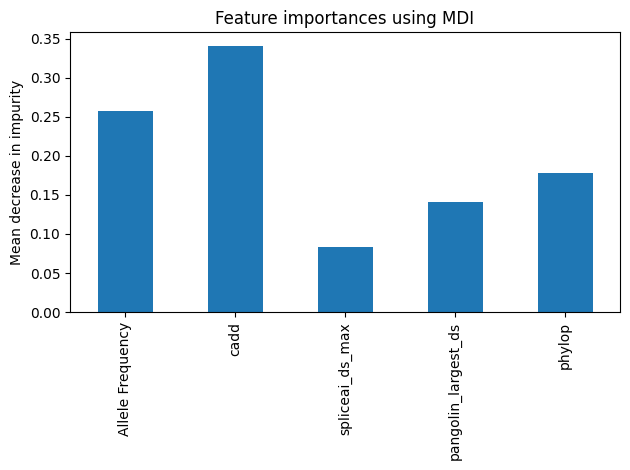

In [35]:
forest_importances = pd.Series(importances, index=["Allele Frequency", "cadd", "spliceai_ds_max", "pangolin_largest_ds", "phylop"])

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#### Testing

In [36]:
from sklearn.metrics import accuracy_score

Y_predicted = forest.predict(X_test)

accuracy = accuracy_score(Y_test,Y_predicted)
accuracy

0.8020833333333334

C:\Users\arche\AppData\Local\Temp\ipykernel_10044\3653182894.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=pd.DataFrame(Y_predicted, columns = ["ClinVar Germline Classification"]), x="ClinVar Germline Classification", palette='viridis')


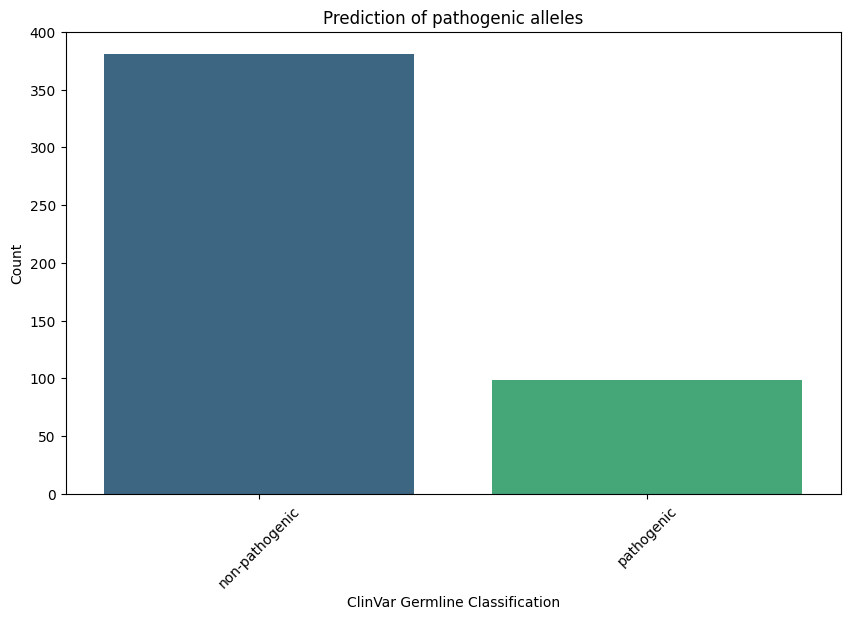

In [37]:
plt.figure(figsize=(10, 6))  # Width: 10, Height: 6

sns.countplot(data=pd.DataFrame(Y_predicted, columns = ["ClinVar Germline Classification"]), x="ClinVar Germline Classification", palette='viridis')

plt.xticks(rotation=45)  # Rotate labels by 45 degrees

plt.ylabel('Count')
plt.title('Prediction of pathogenic alleles')

# Show the plot
plt.show()

#### Using the model

In [38]:
Y_virtual = forest.predict(unlabeled)
Y_virtual

array(['non-pathogenic', 'non-pathogenic', 'non-pathogenic', ...,
       'non-pathogenic', 'non-pathogenic', 'pathogenic'],
      shape=(3470,), dtype=object)

C:\Users\arche\AppData\Local\Temp\ipykernel_10044\1180413374.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=pd.DataFrame(Y_virtual, columns = ["ClinVar Germline Classification"]), x="ClinVar Germline Classification", palette='viridis')


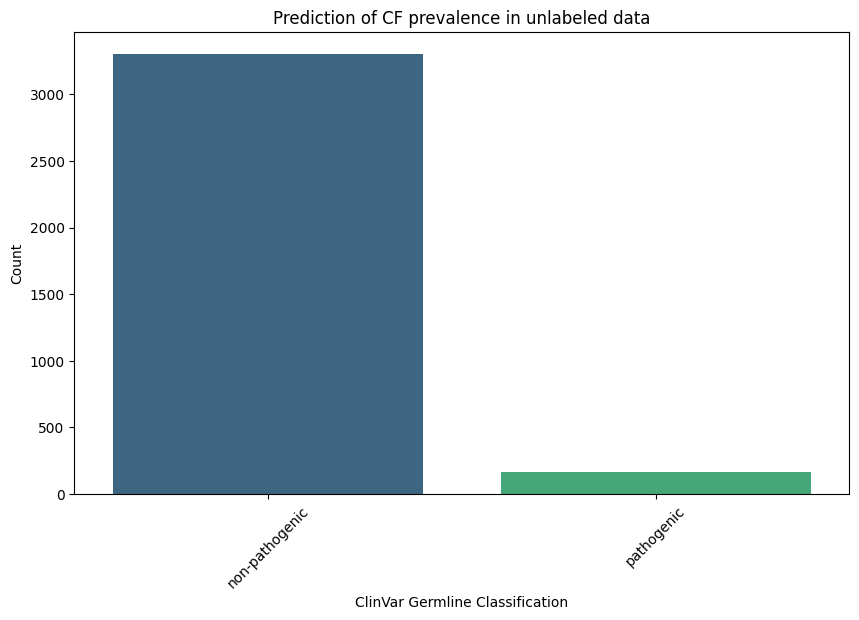

In [39]:
plt.figure(figsize=(10, 6))  # Width: 10, Height: 6

sns.countplot(data=pd.DataFrame(Y_virtual, columns = ["ClinVar Germline Classification"]), x="ClinVar Germline Classification", palette='viridis')

plt.xticks(rotation=45)  # Rotate labels by 45 degrees

plt.ylabel('Count')
plt.title('Prediction of CF prevalence in unlabeled data')

# Show the plot
plt.show()

## Clustering

In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [41]:
df = pd.read_csv('new_gnomAD.csv').dropna(subset = ['ClinVar Germline Classification'])
for key in df.columns :
    if "Unnamed" in key :
        print("coucou")
        df = df.drop(key, axis = 1)
df.columns

Index(['gnomAD ID', 'Position', 'rsIDs', 'Reference', 'Alternate',
       'Filters - exomes', 'Filters - genomes', 'Protein Consequence',
       'Transcript Consequence', 'VEP Annotation',
       'ClinVar Germline Classification', 'ClinVar Variation ID',
       'Allele Count', 'Allele Number', 'Allele Frequency', 'Homozygote Count',
       'Hemizygote Count', 'Filters - joint', 'GroupMax FAF group',
       'GroupMax FAF frequency', 'cadd', 'revel_max', 'spliceai_ds_max',
       'pangolin_largest_ds', 'phylop', 'sift_max', 'polyphen_max',
       'Allele Count African/African American',
       'Allele Number African/African American',
       'Allele frequency African/African American',
       'Homozygote Count African/African American',
       'Hemizygote Count African/African American',
       'Allele Count Admixed American', 'Allele Number Admixed American',
       'Allele frequency Admixed American',
       'Homozygote Count Admixed American',
       'Hemizygote Count Admixed American

In [42]:
# X = df[["a","b","c"]].dropna()


In [43]:
df['ClinVar Germline Classification']

33                                     Likely benign
35      Conflicting classifications of pathogenicity
51                                     Likely benign
52                                        Pathogenic
56                              Benign/Likely benign
                            ...                     
5776                          Uncertain significance
5779                          Uncertain significance
5781                               Likely pathogenic
5783    Conflicting classifications of pathogenicity
5786                          Uncertain significance
Name: ClinVar Germline Classification, Length: 2413, dtype: object

In [44]:
X = df[["Allele Frequency", "cadd", "spliceai_ds_max", "pangolin_largest_ds", "phylop", "ClinVar Germline Classification"]]

In [45]:
X= X[X['Allele Frequency'] < 1] # remove errors
X

,Allele Frequency,cadd,spliceai_ds_max,pangolin_largest_ds,phylop,ClinVar Germline Classification
33,1.866419e-06,17.00,0.0,0.03,3.860,Likely benign
35,1.245206e-06,17.10,0.0,-0.05,3.140,Conflicting classifications of pathogenicity
51,4.337604e-06,12.80,0.0,-0.05,0.926,Likely benign
52,1.858996e-06,22.80,0.0,-0.20,1.860,Pathogenic
56,5.186798e-02,15.20,0.0,-0.07,1.740,Benign/Likely benign
...,...,...,...,...,...,...
5776,2.478656e-06,24.30,0.0,0.02,6.910,Uncertain significance
5779,6.197184e-07,25.60,0.0,0.01,3.640,Uncertain significance
5781,6.197277e-07,10.20,0.0,0.02,1.190,Likely pathogenic
5783,1.127952e-04,4.33,0.0,0.01,0.261,Conflicting classifications of pathogenicity


In [46]:
X

,Allele Frequency,cadd,spliceai_ds_max,pangolin_largest_ds,phylop,ClinVar Germline Classification
33,1.866419e-06,17.00,0.0,0.03,3.860,Likely benign
35,1.245206e-06,17.10,0.0,-0.05,3.140,Conflicting classifications of pathogenicity
51,4.337604e-06,12.80,0.0,-0.05,0.926,Likely benign
52,1.858996e-06,22.80,0.0,-0.20,1.860,Pathogenic
56,5.186798e-02,15.20,0.0,-0.07,1.740,Benign/Likely benign
...,...,...,...,...,...,...
5776,2.478656e-06,24.30,0.0,0.02,6.910,Uncertain significance
5779,6.197184e-07,25.60,0.0,0.01,3.640,Uncertain significance
5781,6.197277e-07,10.20,0.0,0.02,1.190,Likely pathogenic
5783,1.127952e-04,4.33,0.0,0.01,0.261,Conflicting classifications of pathogenicity


In [47]:
Y = np.array(X['ClinVar Germline Classification'].copy())
for i in range(len(Y)) :
    print(i)
    if Y[i] in ['Conflicting classifications of pathogenicity', 'Pathogenic', 'Pathogenic/Likely pathogenic']:
        Y[i] = 1 # pathogenic
    else :
        Y[i] = 0 # non-pathogenic

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [48]:
X["ClinVar Germline Classification"] = Y

In [49]:
X['Allele Frequency'].min()

np.float64(6.195019204559534e-07)

In [50]:
X['Allele Frequency'] = np.log10(X['Allele Frequency'] + 1e-08) + 8

In [51]:
X.dropna()


,Allele Frequency,cadd,spliceai_ds_max,pangolin_largest_ds,phylop,ClinVar Germline Classification
33,2.273330,17.00,0.0,0.03,3.860,0
35,2.098715,17.10,0.0,-0.05,3.140,1
51,2.638250,12.80,0.0,-0.05,0.926,0
52,2.271608,22.80,0.0,-0.20,1.860,1
56,6.714899,15.20,0.0,-0.07,1.740,0
...,...,...,...,...,...,...
5776,2.395965,24.30,0.0,0.02,6.910,0
5779,1.799146,25.60,0.0,0.01,3.640,0
5781,1.799153,10.20,0.0,0.02,1.190,0
5783,4.052329,4.33,0.0,0.01,0.261,1


In [52]:
scaler = StandardScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X))
X_normalized = X_normalized.dropna()
X_normalized = X_normalized.to_numpy()

for n in range(2, 20) :

    
    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=n, random_state=42)
    labels = kmeans.fit_predict(X_normalized)



    # Calculate Silhouette Score
    score = silhouette_score(X_normalized, labels)
    print('Silhouette Score for ', n, ' clusters:', score)

Silhouette Score for  2  clusters: 0.297477595599174
Silhouette Score for  3  clusters: 0.3391194456861682
Silhouette Score for  4  clusters: 0.3531166634055129
Silhouette Score for  5  clusters: 0.380421155030971
Silhouette Score for  6  clusters: 0.3963215144315181
Silhouette Score for  7  clusters: 0.30266931176348594
Silhouette Score for  8  clusters: 0.3114459260412399
Silhouette Score for  9  clusters: 0.3239826263395004
Silhouette Score for  10  clusters: 0.3007538559277627
Silhouette Score for  11  clusters: 0.2957670675049013
Silhouette Score for  12  clusters: 0.30888777908344106
Silhouette Score for  13  clusters: 0.3055437360947393
Silhouette Score for  14  clusters: 0.304314097355473
Silhouette Score for  15  clusters: 0.29421151364027276
Silhouette Score for  16  clusters: 0.29459580904958194
Silhouette Score for  17  clusters: 0.2950852013303156
Silhouette Score for  18  clusters: 0.29444318853785506
Silhouette Score for  19  clusters: 0.2825102058099214


In [53]:
kmeans = KMeans(n_clusters=6, random_state=42)
labels = kmeans.fit_predict(X_normalized)

In [54]:
X_normalized

array([[-0.34354703, -0.12211367, -0.36129876,  0.37579069,  0.1117443 ,
        -0.62802497],
       [-0.54719619, -0.11296441, -0.36129876, -0.05928522, -0.08210701,
         1.59229339],
       [ 0.08205069, -0.50638239, -0.36129876, -0.05928522, -0.67819982,
        -0.62802497],
       ...,
       [-0.89656848, -0.74426303, -0.36129876,  0.3214062 , -0.607121  ,
        -0.62802497],
       [ 1.73125748, -1.28132433, -0.36129876,  0.26702171, -0.85724305,
         1.59229339],
       [-0.89635282, -1.24381238, -0.36129876,  0.75648211, -0.78885661,
        -0.62802497]], shape=(2397, 6))

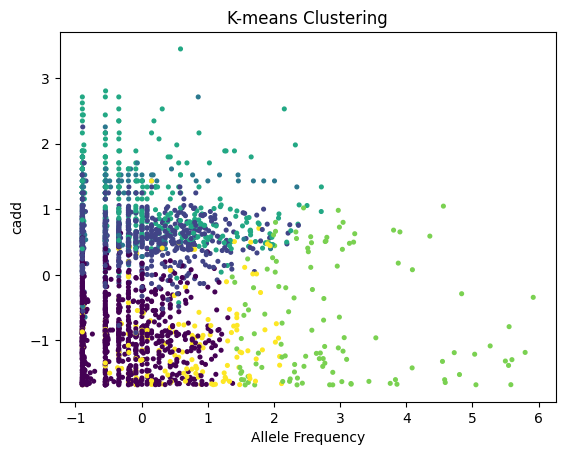

In [55]:
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=labels, cmap='viridis', s=7)
plt.xlabel('Allele Frequency')
plt.ylabel('cadd')
plt.title('K-means Clustering')
plt.show()

## Estimating the number of people with two pathogenic alleles

In [56]:
df = pd.read_csv('new_gnomAD.csv')
for key in df.columns :
    if "Unnamed" in key :
        print("coucou")
        df = df.drop(key, axis = 1)
df.columns

Index(['gnomAD ID', 'Position', 'rsIDs', 'Reference', 'Alternate',
       'Filters - exomes', 'Filters - genomes', 'Protein Consequence',
       'Transcript Consequence', 'VEP Annotation',
       'ClinVar Germline Classification', 'ClinVar Variation ID',
       'Allele Count', 'Allele Number', 'Allele Frequency', 'Homozygote Count',
       'Hemizygote Count', 'Filters - joint', 'GroupMax FAF group',
       'GroupMax FAF frequency', 'cadd', 'revel_max', 'spliceai_ds_max',
       'pangolin_largest_ds', 'phylop', 'sift_max', 'polyphen_max',
       'Allele Count African/African American',
       'Allele Number African/African American',
       'Allele frequency African/African American',
       'Homozygote Count African/African American',
       'Hemizygote Count African/African American',
       'Allele Count Admixed American', 'Allele Number Admixed American',
       'Allele frequency Admixed American',
       'Homozygote Count Admixed American',
       'Hemizygote Count Admixed American

In [57]:
df['Allele Frequency'].nlargest(20) # Some things are weird : some data was translated to the right. Let's just ignore them

3607    1.614012e+06
1066    1.614000e+06
5289    1.613992e+06
1596    1.613900e+06
4860    1.613738e+06
643     1.613670e+06
4840    1.613606e+06
664     1.613580e+06
452     1.612926e+06
2364    1.611174e+06
2363    1.610964e+06
2365    1.610814e+06
2367    1.609772e+06
901     1.605878e+06
422     1.594642e+06
1898    1.536052e+06
2091    4.391197e-01
3240    3.449310e-01
2044    2.325689e-01
5748    2.251766e-01
Name: Allele Frequency, dtype: float64

In [58]:
df = df[df['Allele Frequency'] < 1]
df['Allele Frequency'].nlargest(20)

2091    0.439120
3240    0.344931
2044    0.232569
5748    0.225177
1252    0.213731
1872    0.210215
4521    0.191206
1865    0.121520
1894    0.079448
1370    0.076511
56      0.051868
1199    0.048607
4942    0.041586
3717    0.031798
1889    0.031228
471     0.030080
1892    0.029269
2218    0.020082
2167    0.011931
4043    0.011836
Name: Allele Frequency, dtype: float64

In [59]:
# df = df.drop(columns = ['Chromosome', 'Source', 'Transcript', 'HGVS Consequence', 'Flags'])

In [60]:
SF = df['Allele Frequency'].sum()

In [61]:
SF

np.float64(2.6115458444656516)

In [62]:
rescale = 1.4e9 * 0.41 # 41% of the African population (1.4 billion) is less than 15 yo (cf source wiki). Keep in mind life expectancy of CF patients is 20yo in Africa.

In [ ]:
# Now we must multiply the number of people with two pathogenic alleles by 'rescale'.
# First calculate P the sum of pathogenic alleles frequency, then put to the square.